# Netflix - Data Exploration and Visualisation

### Questions that I have asked:


1. What is the month that have least releases?
2. What is the most genre in the data set movies/Tv shows ?
3. In which year has largest number of movies/tv shows been released?
4. Which country has released most movies/Tv shows?
5. What is the range of duration to movies/Tv shows?
6. What is the most popular rating in movies/Tv shows?
7. What is the TV show that has most seasons?

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

--2023-09-22 11:42:18--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.181, 13.224.9.129, 13.224.9.24, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv.2’

netflix.csv.2       100%[===================>]   3.24M  --.-KB/s    in 0.06s   

2023-09-22 11:42:18 (51.7 MB/s) - ‘netflix.csv.2’ saved [3399671/3399671]



In [101]:
#read csv file
net = pd.read_csv('netflix.csv')
net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [102]:
#number of rows and columns
net.shape

(8807, 12)

In [103]:
#show column names
net.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [104]:
#show all the datatype used and count of all non-null values
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [105]:
#summary statistics of numberic (integer) columns
net.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [106]:
#summary statistics of object columns
net.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


### Conclusion:

- The dataset has 8807 rows and 12 columns.
- For the questions that we have asked the id and description dataset are not relevant, so we can drop them.
- There are six columns with null values, so we need to clean the dataset.


###Cleaning the dataset

- Cleaning the country column

In [107]:
# net['country'].unique()

In [108]:
net['country'].isna().sum()

831

In [109]:
country_mode = net['country'].mode()
country_mode = country_mode[0]

In [110]:
# imputing null values with the mode of the column
net['country'] = net['country'].fillna(country_mode)
# separating the countries from countries column, which have more than one country as value
net['country'] = net['country'].astype(str)
net['country'] = net['country'].apply(lambda x: x.split(', ')[0])

In [111]:
net['country'].value_counts()

United States     4041
India             1008
United Kingdom     626
Canada             271
Japan              259
                  ... 
Namibia              1
Senegal              1
Cameroon             1
Syria                1
Somalia              1
Name: country, Length: 89, dtype: int64

- Cleaning the rating column

In [112]:
net['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [113]:
# changing certain rating values as they do not appear to be correct
net['rating'] = net['rating'].replace({'74 min': np.nan, '84 min': np.nan, '66 min': np.nan})

- Cleaning the director column

In [114]:
net['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [115]:
# imputing null values with NA
net['director'].fillna('NA', inplace = True)

- Cleaning the cast column

In [116]:
# imputing null values with NA
net['cast'].fillna('NA', inplace = True)

In [117]:
# imputing null values with the mode for rating, date_added, duration
mode_col = ['rating', 'date_added', 'duration']
for i in mode_col:
  net[i] = net[i].fillna(net[i].mode()[0])

In [118]:
# adding month and year as new columns in our dataset
net['date_added'] = pd.to_datetime(net['date_added'])
net['month'] = net['date_added'].dt.month_name()
net['year'] = net['date_added'].dt.year

In [119]:
# now we remove the unwanted columns
net.drop(['show_id', 'date_added', 'description'], axis = 1, inplace = True)

In [120]:
net.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,month,year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2020,PG-13,90 min,Documentaries,September,2021
1,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021
3,TV Show,Jailbirds New Orleans,NA,NA,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV",September,2021
4,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September,2021


In [121]:
net.isna().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
month           0
year            0
dtype: int64

### Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

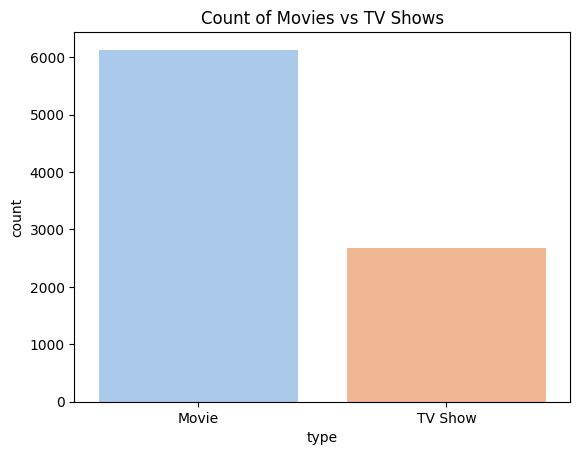

In [122]:
# Count of Movies vs TV Shows
sns.countplot(data = net, x = 'type', palette = 'pastel')
plt.title('Count of Movies vs TV Shows')
plt.show

- We can observe in the above graph that the number of movies is approximately more than twice the number of tv shows

###Which month has the least releases?


In [123]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']


shows_per_month = net.groupby(['year'])['month'].value_counts().unstack(fill_value = 0)[months].astype(int)
shows_per_month

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2008,1,1,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,1,0,0,0,0,0,1,0
2010,0,0,0,0,0,0,0,0,0,0,1,0
2011,0,0,0,0,1,0,0,0,1,11,0,0
2012,0,1,0,0,0,0,0,0,0,0,1,1
2013,0,0,1,0,0,0,0,1,2,3,2,2
2014,2,2,0,2,0,1,1,1,1,4,4,6
2015,1,4,5,5,6,6,7,2,7,14,4,21
2016,43,15,17,22,13,18,28,34,48,51,44,96


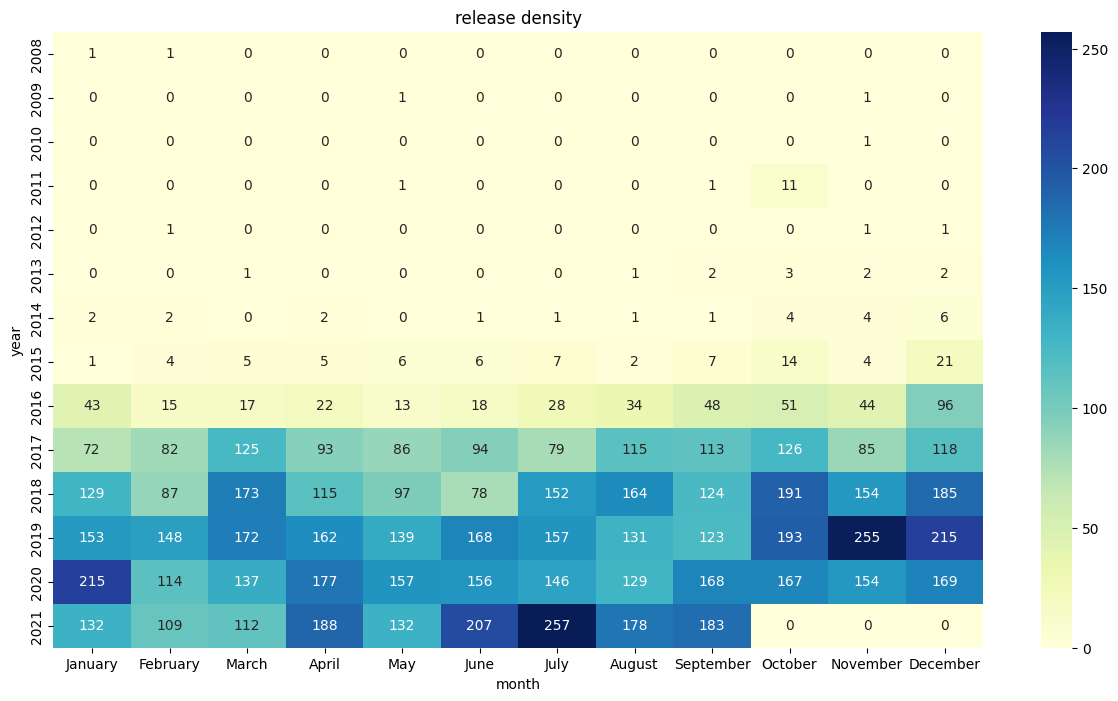

In [124]:
plt.figure(figsize = (15,8))
sns.heatmap(shows_per_month, cmap = 'YlGnBu', annot = True, fmt = 'g')
plt.title('release density')
plt.show()

- As we can see from this graph, February and May are the months with the least release density. And the best months to add content would be October and December

###What is the most genre in the data set movies/Tv shows ?

In [125]:
movies = net['type'] == 'Movie'
movies_df = net[movies]
movies_df.shape

(6131, 11)

In [126]:
tvshow = net['type'] == 'TV Show'
tvshow_df = net[tvshow]
tvshow_df.shape

(2676, 11)

In [127]:
genres = {}
for genre in movies_df['listed_in']:
  for i in genre.split(','):
    i = i.strip()
    if i not in genres:
      genres[i] = 1
    else:
      genres[i] += 1

movie_genres = pd.DataFrame(list(genres.items()), columns= ['Genre', 'Number of Movies'])
movie_genres['Genre'].unique()

array(['Documentaries', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'Comedies',
       'Thrillers', 'Romantic Movies', 'Music & Musicals',
       'Horror Movies', 'Sci-Fi & Fantasy', 'Action & Adventure',
       'Classic Movies', 'Anime Features', 'Sports Movies', 'Cult Movies',
       'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy',
       'Movies'], dtype=object)

In [128]:
movie_genres.sort_values(by = 'Number of Movies', ascending = False).head()

,Genre,Number of Movies
4,International Movies,2752
2,Dramas,2427
5,Comedies,1674
0,Documentaries,869
11,Action & Adventure,859


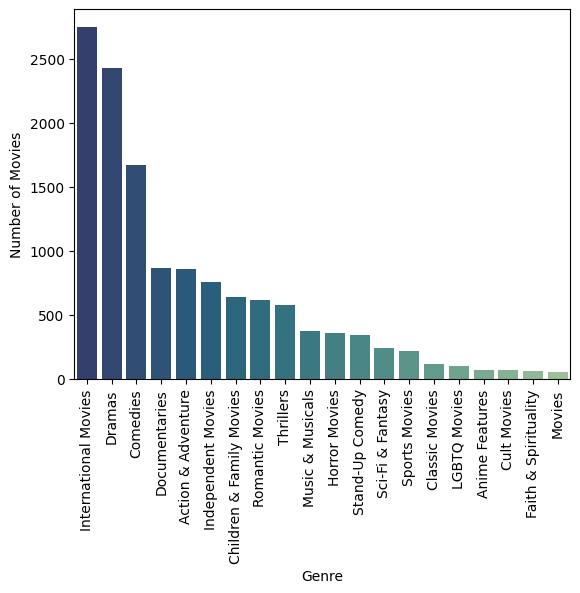

In [129]:
sns.barplot(x = 'Genre', y = 'Number of Movies', data = movie_genres.sort_values(by = 'Number of Movies', ascending = False), palette = 'crest_r')
plt.xticks(rotation = 90)
plt.show()

- We can see here that International Movies is the genre with maximum movies

In [130]:
genres_tv = {}
for genre in tvshow_df['listed_in']:
  for i in genre.split(','):
    if i not in genres_tv:
      i = i.strip()
      if i not in genres_tv:
        genres_tv[i] = 1
      else:
        genres_tv[i] += 1

tvshow_genres = pd.DataFrame(data = list(genres_tv.items()), columns = ['Genre', 'Number of TV_Show'])
tvshow_genres['Genre'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Mysteries',
       'Crime TV Shows', 'TV Action & Adventure', 'Docuseries',
       'Reality TV', 'Romantic TV Shows', 'TV Comedies', 'TV Horror',
       'British TV Shows', 'Spanish-Language TV Shows', 'TV Thrillers',
       "Kids' TV", 'TV Sci-Fi & Fantasy', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'TV Shows', 'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV'],
      dtype=object)

In [131]:
tvshow_genres.head()

,Genre,Number of TV_Show
0,International TV Shows,578
1,TV Dramas,696
2,TV Mysteries,98
3,Crime TV Shows,72
4,TV Action & Adventure,128


In [132]:
tvshow_genres = tvshow_genres.sort_values('Number of TV_Show', ascending = False)
tvshow_genres

,Genre,Number of TV_Show
1,TV Dramas,696
0,International TV Shows,578
8,TV Comedies,461
7,Romantic TV Shows,338
5,Docuseries,175
11,Spanish-Language TV Shows,172
16,Korean TV Shows,151
6,Reality TV,135
4,TV Action & Adventure,128
2,TV Mysteries,98


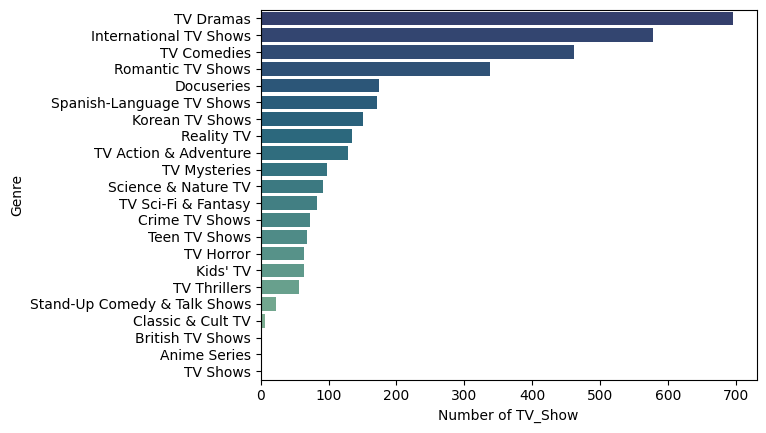

In [133]:
sns.barplot(data = tvshow_genres, x = 'Number of TV_Show', y = 'Genre', palette = 'crest_r')
# plt.xticks(rotation = 90)
plt.show()

###In which year has largest number of movies/tv shows been released?

In [134]:
release_per_year = net.groupby(['release_year'])['type'].value_counts().unstack(level = -1).reset_index()
release_per_year

type,release_year,Movie,TV Show
0,1925,NaN,1.0
1,1942,2.0,NaN
2,1943,3.0,NaN
3,1944,3.0,NaN
4,1945,3.0,1.0
...,...,...,...
69,2017,767.0,265.0
70,2018,767.0,380.0
71,2019,633.0,397.0
72,2020,517.0,436.0


<Axes: xlabel='release_year', ylabel='Movie'>

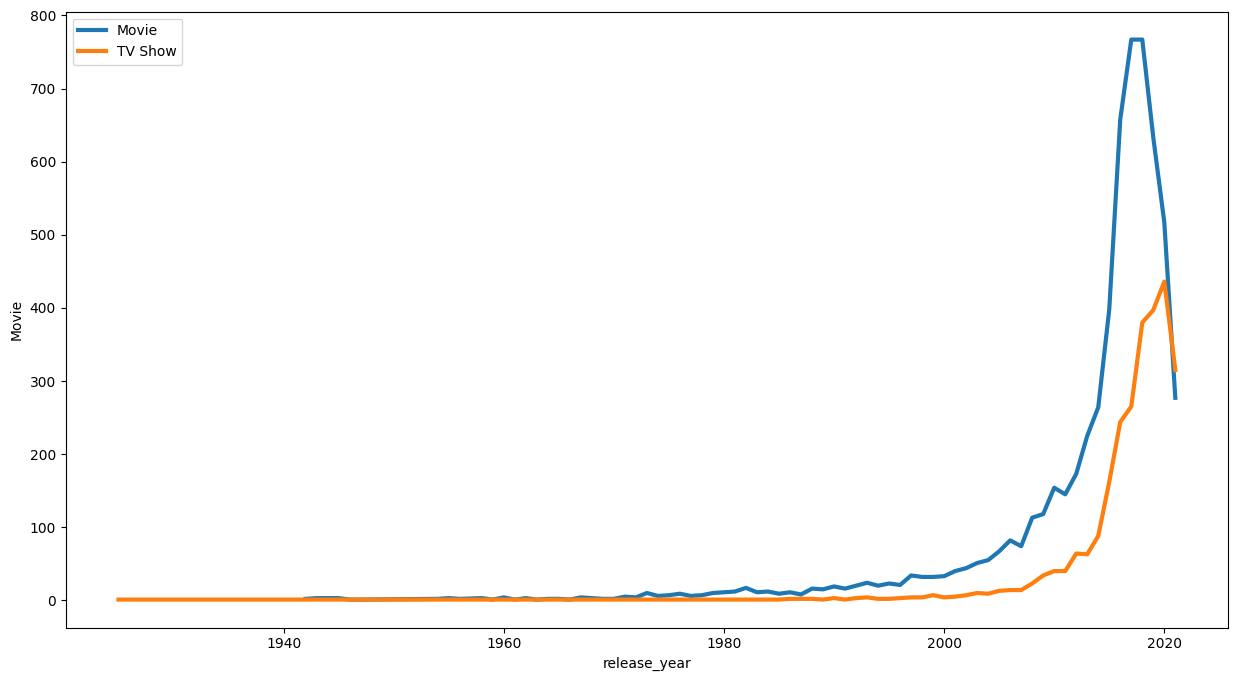

In [135]:
plt.figure(figsize =(15,8))
sns.lineplot(data = release_per_year, x = 'release_year',  y = 'Movie', label = 'Movie', linewidth = 3)
sns.lineplot(data = release_per_year, x = 'release_year',  y = 'TV Show', label = 'TV Show', linewidth = 3)



In [136]:
release_data = net.groupby(['release_year'])['type'].value_counts()
release_data

release_year  type   
1925          TV Show      1
1942          Movie        2
1943          Movie        3
1944          Movie        3
1945          Movie        3
                        ... 
2019          TV Show    397
2020          Movie      517
              TV Show    436
2021          TV Show    315
              Movie      277
Name: type, Length: 119, dtype: int64

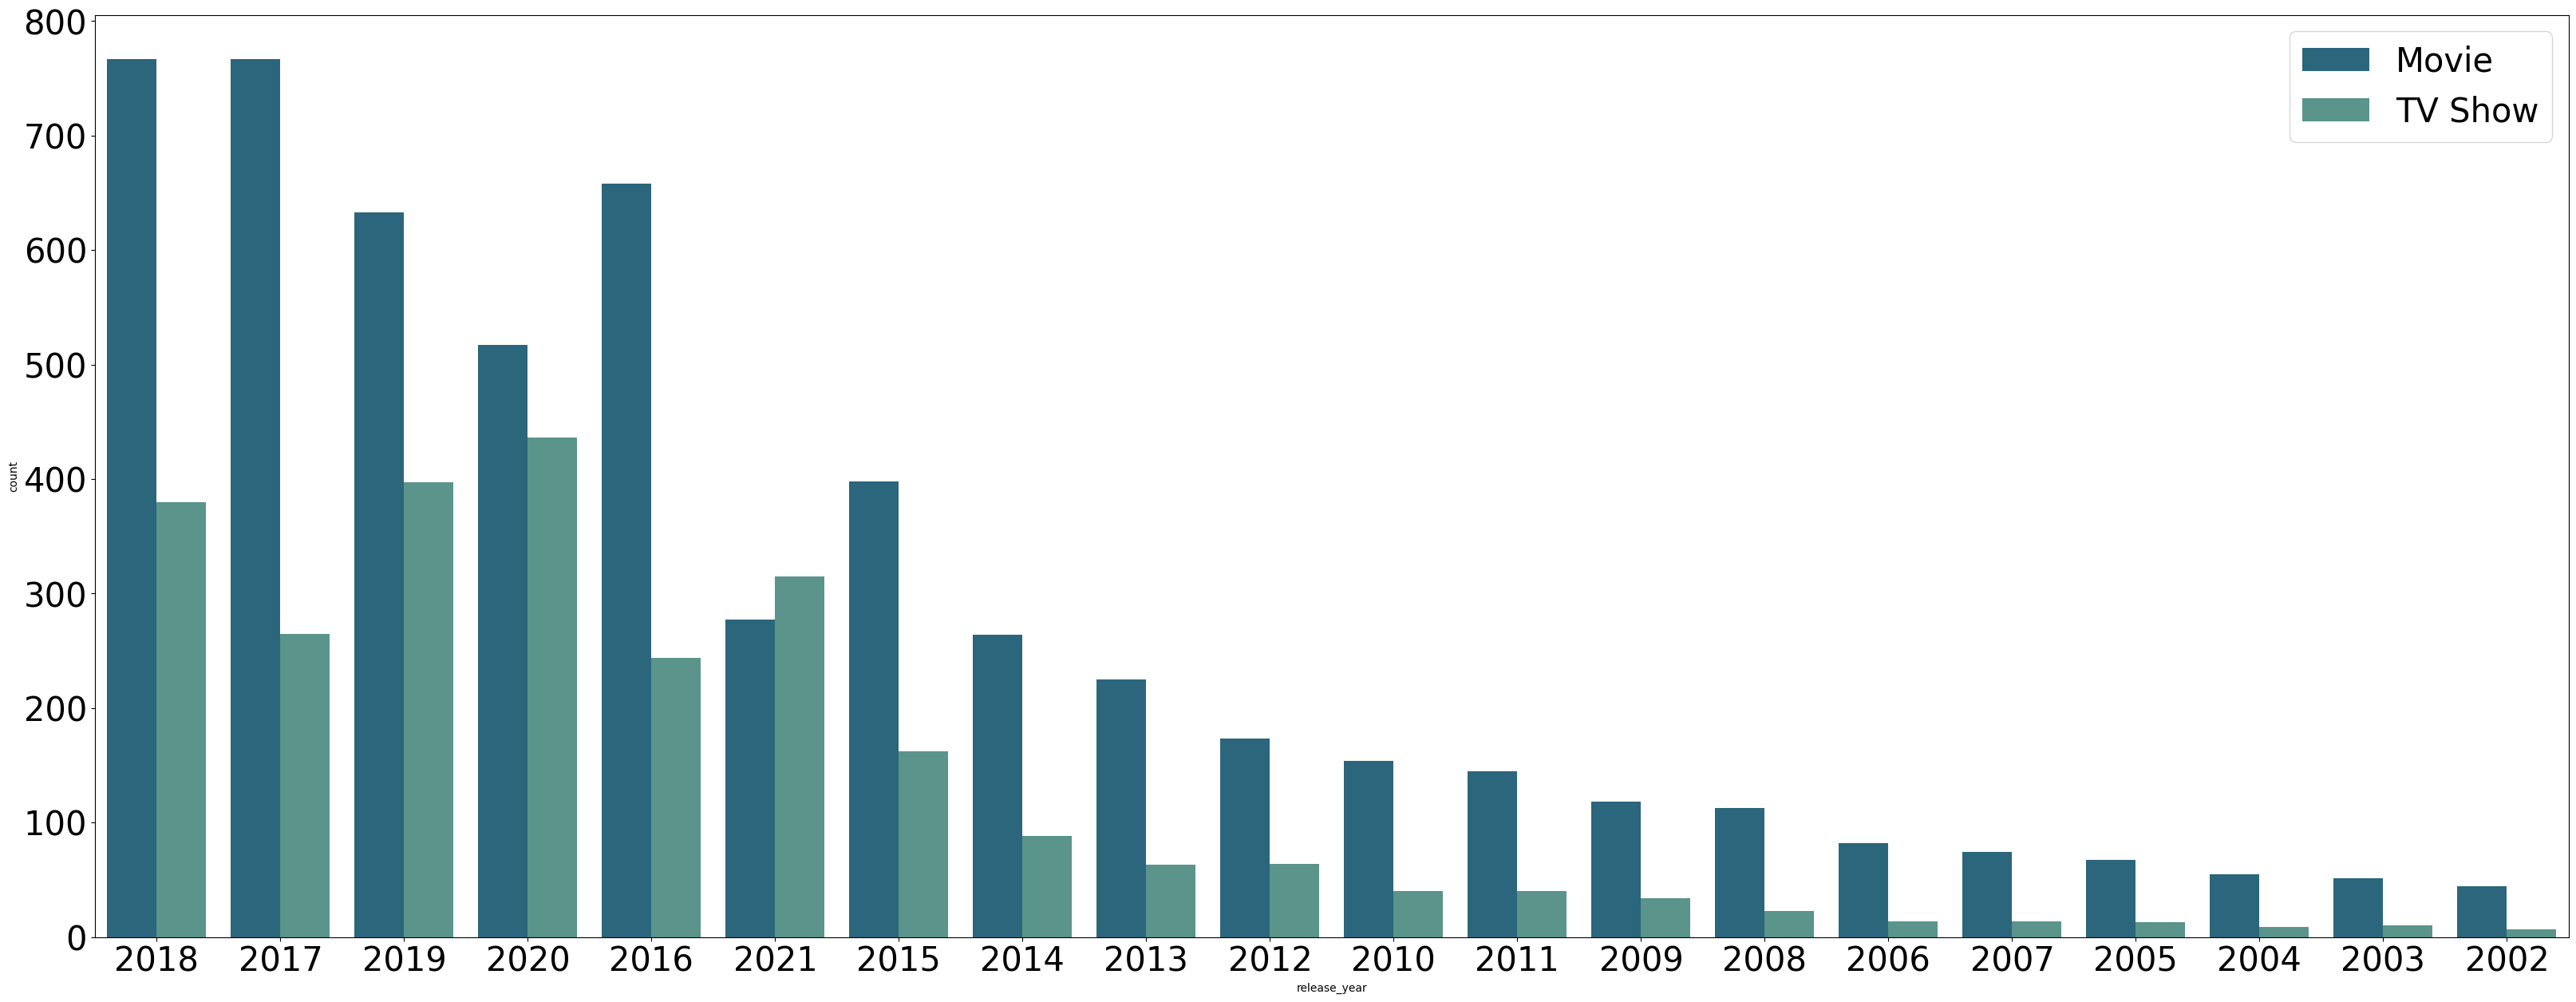

In [137]:
plt.figure(figsize = (40,15))
sns.countplot(data = net, x = 'release_year', hue = 'type', palette = 'crest_r', order = net['release_year'].value_counts().index[0:20])
# plt.xticks(rotation = 90)
plt.tick_params(labelsize = 30)
plt.legend(fontsize = 30)
plt.show()

- Maximum movies were released in the year 2017 and 2018
- Maximum TV Shows were released in the year 2020

###Which country has released most movies/Tv shows?

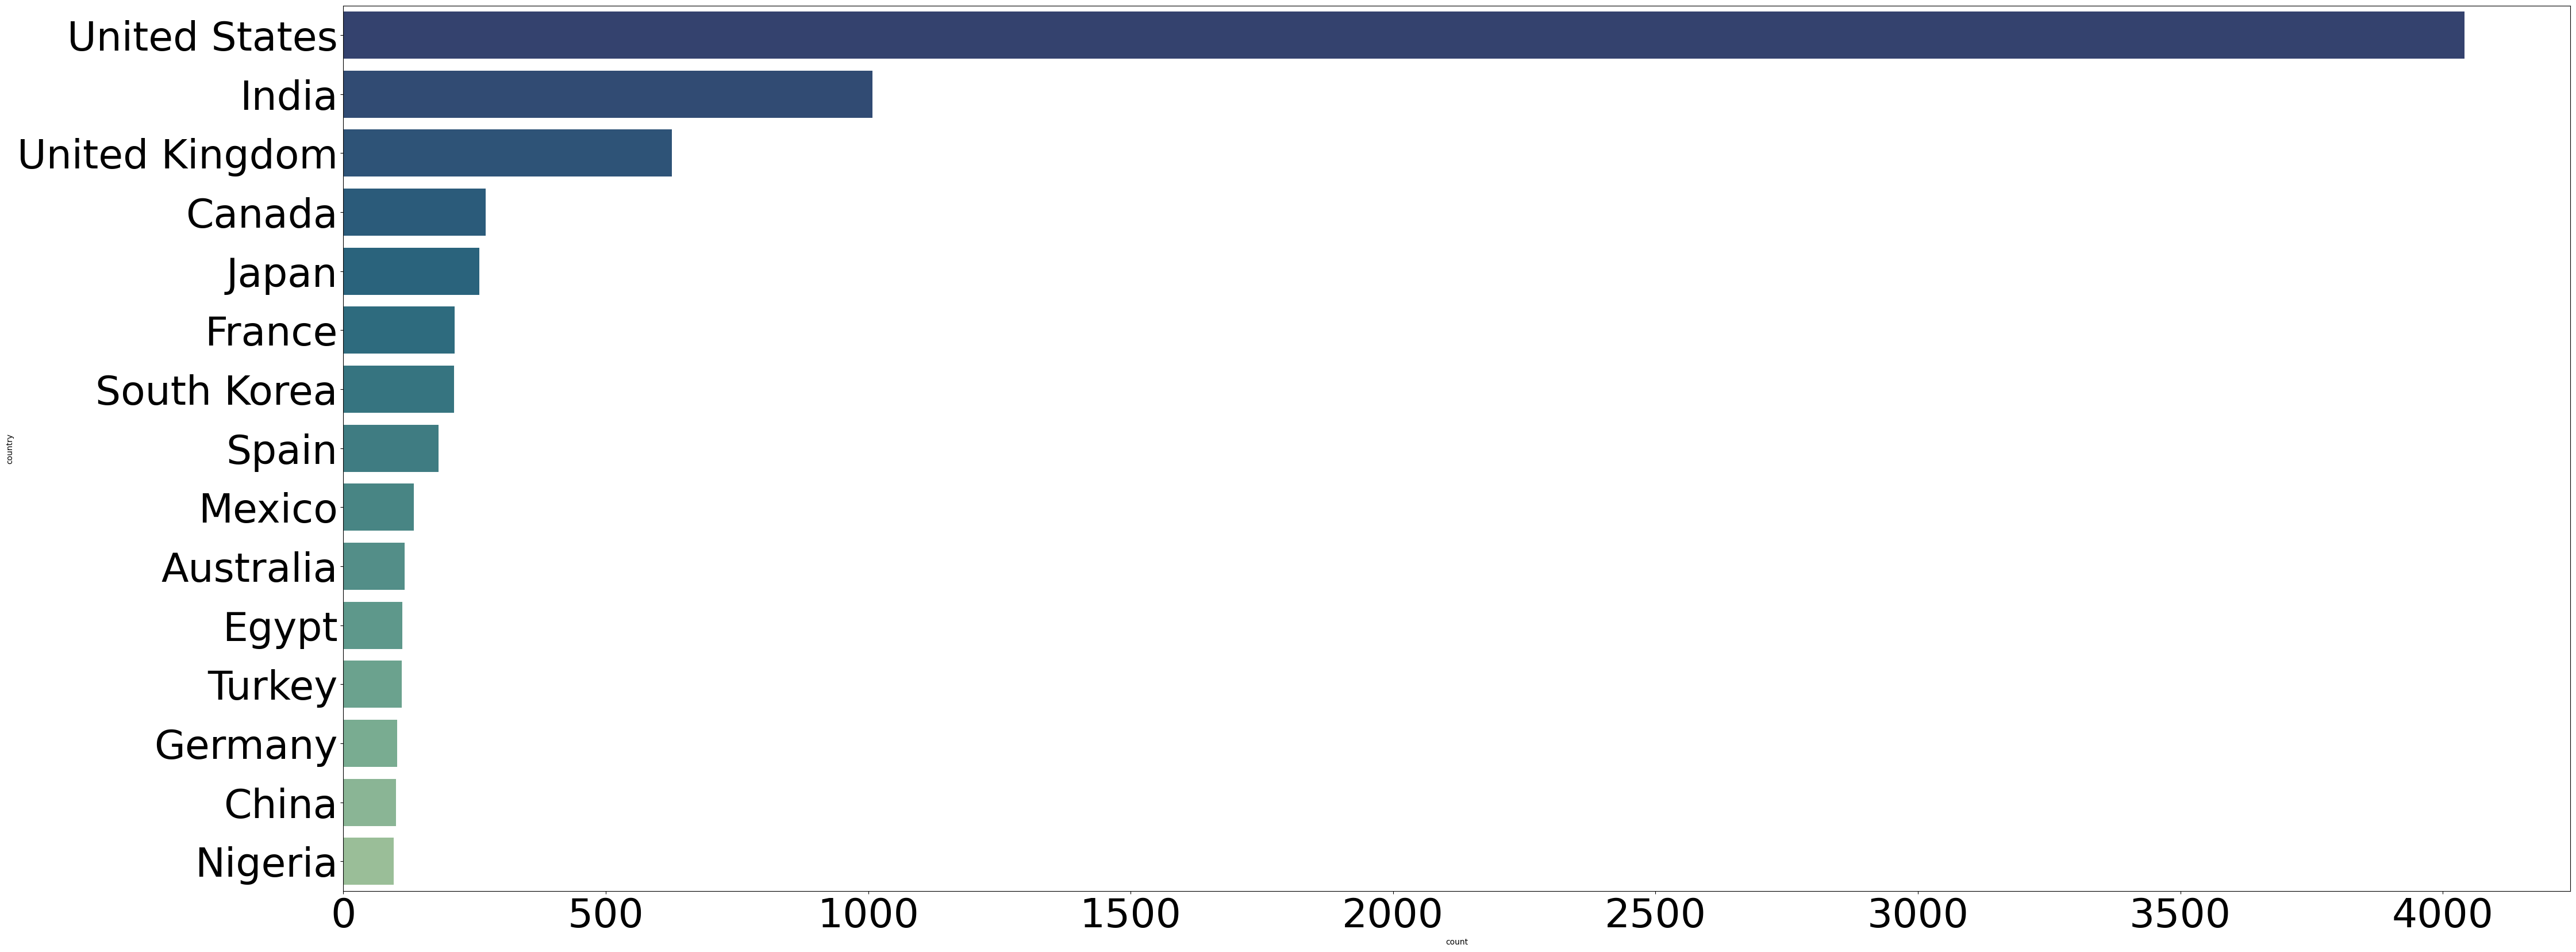

In [138]:
plt.figure(figsize=(50, 20))
sns.countplot(y='country', data=net, palette='crest_r', order =net['country'].value_counts().index[:15])

plt.tick_params(labelsize=50)
plt.show()

- From the above plot we can clearly see that USA has dominated the movie/tv show industry by releasing the maximum number of movies/tv shows

###What is the range of duration to movies/Tv shows?

- Cleaning the duration column for the movies dataframe to get integer values

In [139]:
movies_df['duration'] = movies_df['duration'].str.replace('min',' ').str.replace('Season', ' ').str.strip()
movies_df['duration'] = movies_df['duration'].astype('int32')
movies_df.head()

<ipython-input-139-92d776fb7752>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration'] = movies_df['duration'].str.replace('min',' ').str.replace('Season', ' ').str.strip()
<ipython-input-139-92d776fb7752>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration'] = movies_df['duration'].astype('int32')


,type,title,director,cast,country,release_year,rating,duration,listed_in,month,year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2020,PG-13,90,Documentaries,September,2021
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021,PG,91,Children & Family Movies,September,2021
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",September,2021
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104,"Comedies, Dramas",September,2021
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",Germany,2021,TV-MA,127,"Dramas, International Movies",September,2021


In [140]:
# eliminating the one season movies by taking movies whose duration is more than 1
movie_duration = movies_df[movies_df['duration'] > 1]
movie_duration

,type,title,director,cast,country,release_year,rating,duration,listed_in,month,year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2020,PG-13,90,Documentaries,September,2021
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021,PG,91,Children & Family Movies,September,2021
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",September,2021
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104,"Comedies, Dramas",September,2021
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",Germany,2021,TV-MA,127,"Dramas, International Movies",September,2021
...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",United Arab Emirates,2015,TV-MA,96,"Dramas, International Movies, Thrillers",March,2016
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158,"Cult Movies, Dramas, Thrillers",November,2019
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88,"Comedies, Horror Movies",November,2019
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88,"Children & Family Movies, Comedies",January,2020


<ipython-input-141-8b0f6dab938d>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x= movie_duration['duration'], data = movie_duration, bins=30, palette ='crest_r')


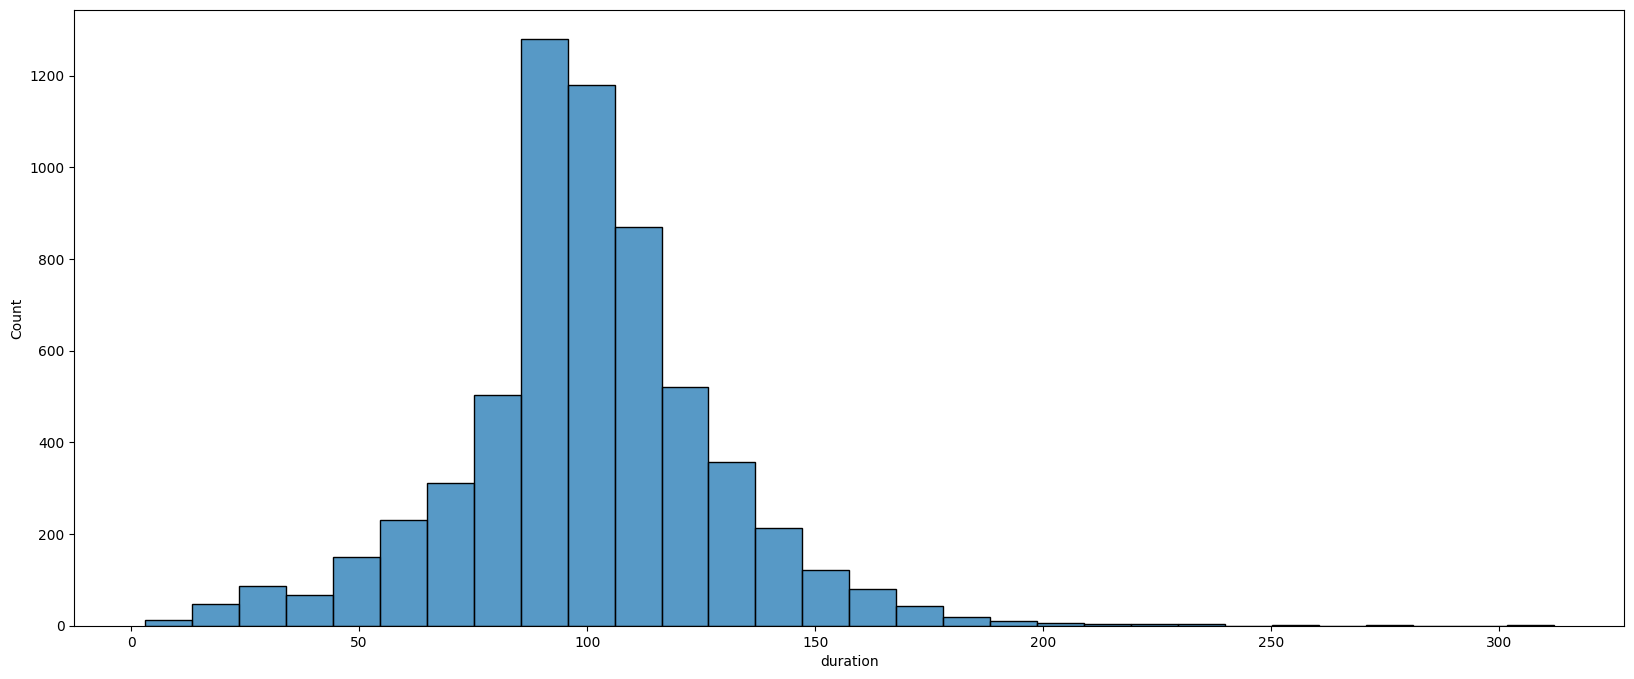

In [141]:
plt.figure(figsize = (20,8))
sns.histplot(x= movie_duration['duration'], data = movie_duration, bins=30, palette ='crest_r')
plt.show()

- We can see that most movies are ranged between 90 - 100 mins

- Cleaning the duration column for the tv shows dataframe to get integer values

In [142]:
tvshow_df['duration'] = tvshow_df['duration'].str.replace('Seasons',' ').str.replace('Season', ' ').str.strip()
tvshow_df['duration'] = tvshow_df['duration'].astype('int32')
tvshow_df.head()

<ipython-input-142-7bffa71c7848>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshow_df['duration'] = tvshow_df['duration'].str.replace('Seasons',' ').str.replace('Season', ' ').str.strip()
<ipython-input-142-7bffa71c7848>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshow_df['duration'] = tvshow_df['duration'].astype('int32')


,type,title,director,cast,country,release_year,rating,duration,listed_in,month,year
1,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",September,2021
3,TV Show,Jailbirds New Orleans,NA,NA,United States,2021,TV-MA,1,"Docuseries, Reality TV",September,2021
4,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",September,2021
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",September,2021


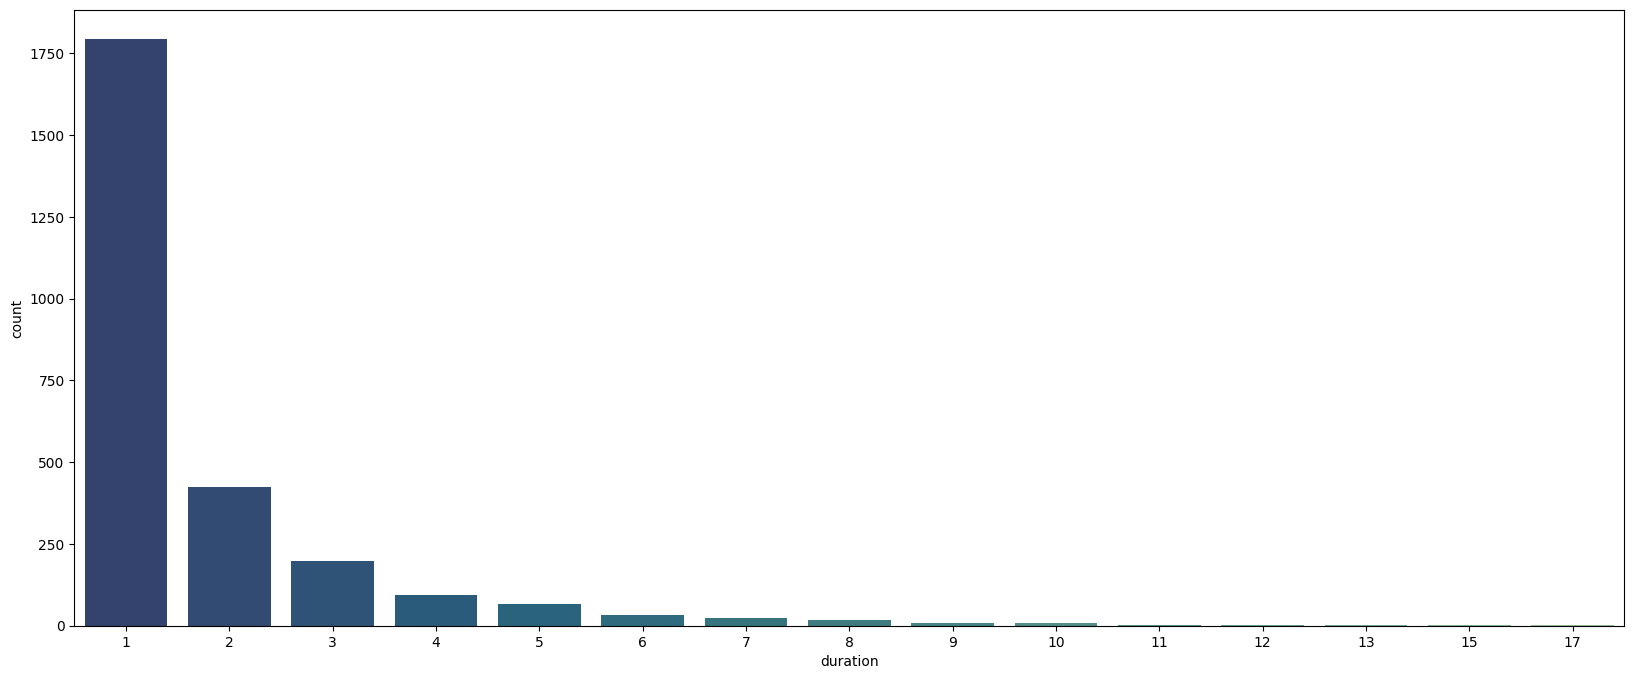

In [144]:
plt.figure(figsize = (20,8))
sns.countplot(x= tvshow_df['duration'], data = tvshow_df, palette ='crest_r')
plt.show()

- We can see that most tv shows are single season

###What is the most popular rating in movies/Tv shows?

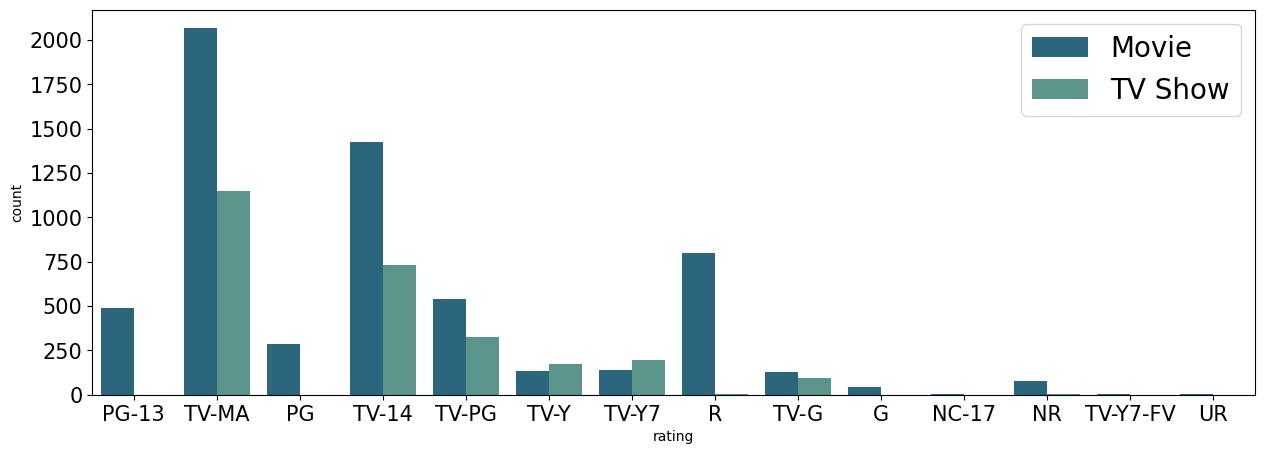

In [145]:
plt.figure(figsize=(15,5))


sns.countplot(x='rating', data=net, palette='crest_r', hue='type')
plt.legend(fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

- TV-MA is the most popular rating for movies as well as tv shows. TV-MA stands for TV Mature Audience

###What is the TV show that has most seasons?

In [146]:
tvshow_df[['duration','title']].sort_values(by='duration', ascending =False).head()

,duration,title
548,17,Grey's Anatomy
2423,15,Supernatural
4798,15,NCIS
1354,13,Heartland
4220,13,COMEDIANS of the world


- The TV Show Grey's Anatomy has the most number of seasons

###Conclusion

From the exploratory data analysis performed on the Netflix dataset we can conlude that:

- More than 60% of the content on Netflix are movies.
- The best time to add content on Netflix would be between October and December. It is during these months that maximum content is released on Netflix.
- A huge chunk of the content is under the genre International movies and International TV Shows closely followed by Drama.
- Very few movies and TV shows were released before 2000, post 2000 the numbers started increasing slowly. By 2015 we can see a spike in the number of movies and TV shows released
- USA has dominated the space by releasing the maximum number of movies and TV shows. In the top 5 countries producing content on Netflix, India comes a distant second. Closely followed by UK, Canada and Japan
- The popular duration for the movies ranges between 90 - 100 minutes, as the maximum movies have been released in the this duration range. And TV shows that the public prefers currently seems to the TV shows with only one season, as the majority of the TV Shows have only one one season on Netflix
- The content produced on Netflix is mostly for mature adults as TV_MA is the most popular rating for movies as well as tv shows released on Netflix

###Business Insights / Recommendations

- Backup plan should be there in tough situations like pandameic to combat the loss

###Movie

- Netflix should be focusing on adding more movies in emerging countries like India, United Kingdom, Canada and France for Adult audience.
- Preferred Duration of movies will be from 80-120 minutes.
- International Movies, Dramas, Comedies should be the preferred genres for Movies.

###TV Show

- For TV Shows Netflix should focus on countries like Japan, South Korea, Canada and France.
- TV Show seasons can be up to 3 preferably.
- International TV Shows, TV Dramas, TV Comedies should be the preferred genres for TV Shows.